In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join
import random

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [ ]:
# import yfinance as yf
# import pandas as pd
# from datetime import datetime, timedelta

# # Function to download stock data
# def download_stock_data(ticker, start_date, end_date):
#     stock_data = yf.download(ticker, start=start_date, end=end_date)
#     if 'Adj Close' in stock_data.columns:
#         return stock_data['Adj Close']
#     return None

# # List of 200 NSE tickers
# def get_nse_tickers():
#     tickers = [
#         "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", 
#         "HINDUNILVR.NS", "HDFC.NS", "BAJFINANCE.NS", "KOTAKBANK.NS", "BHARTIARTL.NS",
#         "ITC.NS", "SBIN.NS", "ASIANPAINT.NS", "LT.NS", "AXISBANK.NS", 
#         "MARUTI.NS", "ULTRACEMCO.NS", "HCLTECH.NS", "NESTLEIND.NS", "TITAN.NS",
#         "SUNPHARMA.NS", "M&M.NS", "WIPRO.NS", "ONGC.NS", "NTPC.NS", 
#         "POWERGRID.NS", "BAJAJFINSV.NS", "COALINDIA.NS", "TATAMOTORS.NS", "DIVISLAB.NS",
#         "GRASIM.NS", "JSWSTEEL.NS", "HEROMOTOCO.NS", "ADANIPORTS.NS", "DRREDDY.NS",
#         "BPCL.NS", "BRITANNIA.NS", "SHREECEM.NS", "CIPLA.NS", "TECHM.NS", 
#         "EICHERMOT.NS", "HINDALCO.NS", "UPL.NS", "SBILIFE.NS", "APOLLOHOSP.NS",
#         "ADANIGREEN.NS", "DMART.NS", "BAJAJ-AUTO.NS", "VEDL.NS", "TATAPOWER.NS", 
#         "GAIL.NS", "PIDILITIND.NS", "DABUR.NS", "HDFCLIFE.NS", "ICICIGI.NS",
#         "MOTHERSUMI.NS", "HAVELLS.NS", "GODREJCP.NS", "MUTHOOTFIN.NS", "BERGEPAINT.NS",
#         "AMBUJACEM.NS", "COLPAL.NS", "ICICIPRULI.NS", "INDIGO.NS", "BIOCON.NS",
#         "LUPIN.NS", "BOSCHLTD.NS", "INDUSTOWER.NS", "INDUSINDBK.NS", "AUROPHARMA.NS",
#         "ACC.NS", "ADANITRANS.NS", "GLAND.NS", "BEL.NS", "ADANIENT.NS", 
#         "BANDHANBNK.NS", "NMDC.NS", "PETRONET.NS", "SRF.NS", "TATASTEEL.NS",
#         "PNB.NS", "ZENSARTECH.NS", "OBEROIRLTY.NS", "CANBK.NS", "JINDALSTEL.NS",
#         "PNCINFRA.NS", "MFSL.NS", "JUBLFOOD.NS", "HAL.NS", "IGL.NS", 
#         "TVSMOTOR.NS", "NIITTECH.NS", "MANAPPURAM.NS", "TATACONSUM.NS", "TORNTPHARM.NS",
#         "EXIDEIND.NS", "ASHOKLEY.NS", "LALPATHLAB.NS", "HDFCAMC.NS", "L&TFH.NS",
#         "AUBANK.NS", "PIIND.NS", "RAMCOCEM.NS", "RECLTD.NS", "CROMPTON.NS",
#         "IDFCFIRSTB.NS", "BATAINDIA.NS", "NAVINFLUOR.NS", "NATIONALUM.NS", "SUNTV.NS",
#         "NAUKRI.NS", "IRCTC.NS", "VOLTAS.NS", "ADANIPOWER.NS", "ALKEM.NS", 
#         "MINDTREE.NS", "ABBOTINDIA.NS", "TATACOMM.NS", "FORTIS.NS", "TATACHEM.NS",
#         "ESCORTS.NS", "GUJGASLTD.NS", "CONCOR.NS", "PAGEIND.NS", "BEML.NS",
#         "BALRAMCHIN.NS", "MRF.NS", "MGL.NS", "ZYDUSLIFE.NS", "PFC.NS", 
#         "CASTROLIND.NS", "NLCINDIA.NS", "AIAENG.NS", "GLAXO.NS", "CUMMINSIND.NS",
#         "GRINDWELL.NS", "UNIONBANK.NS", "LICHSGFIN.NS", "RAJESHEXPO.NS", "GODREJIND.NS",
#         "ABB.NS", "PVR.NS", "CENTURYTEX.NS", "CESC.NS", "SKFINDIA.NS", 
#         "IPCALAB.NS", "SHRIRAMCIT.NS", "TIINDIA.NS", "RATNAMANI.NS", "SUMICHEM.NS",
#         "POLYMED.NS", "SOLARINDS.NS", "SIS.NS", "JBCHEPHARM.NS", "FSL.NS",
#         "BALKRISIND.NS", "AMARAJABAT.NS", "GSPL.NS", "ATUL.NS", "IIFLWAM.NS",
#         "AJANTPHARM.NS", "INOXLEISUR.NS", "KNRCON.NS", "SANOFI.NS", "MAZDOCK.NS",
#         "ORIENTELEC.NS", "SUPREMEIND.NS", "SYNGENE.NS", "FINEORG.NS", "ERIS.NS", 
#         "IFBIND.NS", "SHILPAMED.NS", "FINPIPE.NS", "KEI.NS", "ASTERDM.NS",
#         "LINDEINDIA.NS", "HONAUT.NS", "NHPC.NS", "TCI.NS", "GESHIP.NS",
#         "NFL.NS", "SONACOMS.NS", "CRISIL.NS", "TEAMLEASE.NS", "CHAMBLFERT.NS", 
#         "VGUARD.NS", "ASTERDM.NS", "KAJARIACER.NS", "GRAPHITE.NS", "APLAPOLLO.NS"
#     ]
#     return tickers

# # Set the date range for the last 10 years
# end_date = datetime.now().date()
# start_date = end_date - timedelta(days=10*365)

# # Download data for each ticker and save it in a separate CSV file
# tickers = get_nse_tickers()

# for ticker in tickers:
#     print(f"Downloading data for {ticker}...")
#     data = download_stock_data(ticker, start_date, end_date)
#     if data is not None:
#         # Save to CSV file
#         # csv_filename = f"{ticker.replace('.NS', '')}_adj_close_last_10_years.csv"
#         data.to_csv('E:\\ByCredit\\Finoobs\\Portfolio Optimization\\stocks\\'+ticker[:-3]+'.csv')
#         print(f"Saved data to {ticker}")

# print("Data download and saving complete.")


In [3]:
risk_free_rate = 0.0125
PATH = 'E:\\ByCredit\\Finoobs\\Portfolio Optimization\\stocks\\'

In [4]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

In [5]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    sdate = pd.to_datetime(sdate)
    edate = pd.to_datetime(edate)

    for x in tickers:
        df = get_df_from_csv(x)
        df.index = pd.to_datetime(df.index)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [18]:
def get_file_list(folder_path):
    return [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Function to randomly select files and store them in a list
def get_random_files(folder_path, num_files=None):
    file_list = get_file_list(folder_path)
    
    # If num_files is None, select all files
    if num_files is None or num_files > len(file_list):
        num_files = len(file_list)
    
    # Randomly select files
    random_files = random.sample(file_list, num_files)

    sliced_files = [file[:-4] for file in random_files]
    
    return sliced_files

# Example usage
folder_path = 'E:\\ByCredit\\Finoobs\\Portfolio Optimization\\stocks'  # Replace with the path to your folder
num_files_to_select = 11  # Specify the number of files to select randomly

port_list = get_random_files(folder_path, num_files_to_select)

print("Randomly selected files:")
print(port_list)

Randomly selected files:
['BAJAJFINSV', 'GLAXO', 'BATAINDIA', 'AUBANK', 'LALPATHLAB', 'TCI', 'CROMPTON', 'SUMICHEM', 'POWERGRID', 'PIDILITIND', 'SIS']


In [19]:
mult_df = merge_df_by_column_name('Adj Close',  '2019-01-01', 
                                  end_date , *port_list)
mult_df

,BAJAJFINSV,GLAXO,BATAINDIA,AUBANK,LALPATHLAB,TCI,CROMPTON,SUMICHEM,POWERGRID,PIDILITIND,SIS
Date,,,,,,,,,,,
2019-01-01,650.470459,1323.350952,1050.762207,309.462036,886.502380,269.481842,219.507431,NaN,81.290627,1072.735596,378.601624
2019-01-02,636.712036,1322.953369,1037.698242,308.616180,877.299866,267.097534,217.071564,NaN,79.359985,1078.284546,369.193237
2019-01-03,636.642212,1300.426392,1038.584839,309.163483,875.238892,265.809906,214.495193,NaN,78.465782,1079.842163,367.222931
2019-01-04,639.349915,1280.947144,1041.850708,310.407440,901.168762,270.626343,211.122467,NaN,79.624176,1076.386108,369.735077
2019-01-07,639.020813,1287.926147,1049.875732,306.675659,909.412659,272.963104,212.715149,NaN,80.660629,1073.368286,369.464172
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-19,1551.099976,2931.350098,1425.050049,615.250000,3304.899902,1036.050049,453.600006,530.099976,340.299988,3056.600098,417.600006
2024-08-20,1602.099976,2892.250000,1419.250000,621.150024,3341.350098,1032.400024,453.549988,536.750000,340.500000,3066.449951,420.899994
2024-08-21,1620.949951,3061.449951,1421.050049,625.200012,3290.100098,1041.550049,468.000000,543.750000,336.649994,3057.750000,420.649994


<Axes: xlabel='Date'>

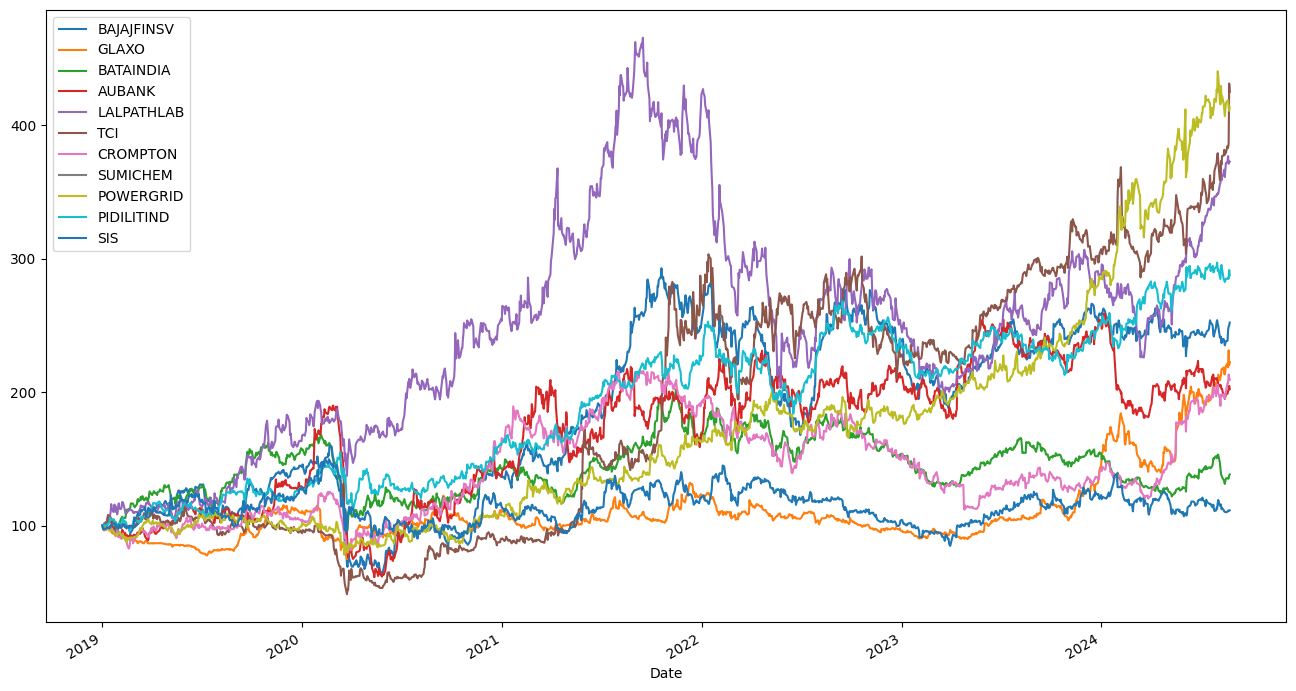

In [20]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))

In [21]:
mult_df = mult_df.apply(pd.to_numeric, errors='coerce')

# # Calculate logarithmic returns
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

BAJAJFINSV    0.167402
GLAXO         0.144756
BATAINDIA     0.058670
AUBANK        0.127484
LALPATHLAB    0.238167
TCI           0.261982
CROMPTON      0.133779
SUMICHEM      0.223385
POWERGRID     0.257037
PIDILITIND    0.191213
SIS           0.019431
dtype: float64

In [22]:
returns.cov() * 252

,BAJAJFINSV,GLAXO,BATAINDIA,AUBANK,LALPATHLAB,TCI,CROMPTON,SUMICHEM,POWERGRID,PIDILITIND,SIS
BAJAJFINSV,0.128076,0.015770,0.045428,0.053707,0.025431,0.037522,0.027867,0.046364,0.026201,0.032955,0.029275
GLAXO,0.015770,0.069030,0.016510,0.014026,0.015813,0.014391,0.016886,0.023594,0.009499,0.011726,0.011607
BATAINDIA,0.045428,0.016510,0.073494,0.032103,0.022929,0.026945,0.025765,0.033411,0.015419,0.025925,0.026984
AUBANK,0.053707,0.014026,0.032103,0.162903,0.018875,0.040737,0.024480,0.034358,0.023739,0.025048,0.025685
LALPATHLAB,0.025431,0.015813,0.022929,0.018875,0.128202,0.024498,0.021204,0.023562,0.007549,0.024663,0.017086
TCI,0.037522,0.014391,0.026945,0.040737,0.024498,0.170323,0.022173,0.034809,0.020918,0.022229,0.023545
CROMPTON,0.027867,0.016886,0.025765,0.024480,0.021204,0.022173,0.101943,0.027271,0.012500,0.019531,0.016929
SUMICHEM,0.046364,0.023594,0.033411,0.034358,0.023562,0.034809,0.027271,0.131772,0.019714,0.024700,0.028106
POWERGRID,0.026201,0.009499,0.015419,0.023739,0.007549,0.020918,0.012500,0.019714,0.078774,0.009458,0.018979
PIDILITIND,0.032955,0.011726,0.025925,0.025048,0.024663,0.022229,0.019531,0.024700,0.009458,0.063038,0.016895


In [23]:
returns.corr()


,BAJAJFINSV,GLAXO,BATAINDIA,AUBANK,LALPATHLAB,TCI,CROMPTON,SUMICHEM,POWERGRID,PIDILITIND,SIS
BAJAJFINSV,1.000000,0.167720,0.468234,0.371819,0.198463,0.254049,0.243878,0.343446,0.260853,0.366758,0.240577
GLAXO,0.167720,1.000000,0.231787,0.132270,0.168089,0.132720,0.201293,0.232885,0.128817,0.177753,0.129923
BATAINDIA,0.468234,0.231787,1.000000,0.293397,0.236215,0.240834,0.297663,0.330312,0.202643,0.380875,0.292731
AUBANK,0.371819,0.132270,0.293397,1.000000,0.130608,0.244562,0.189960,0.225760,0.209556,0.247172,0.187155
LALPATHLAB,0.198463,0.168089,0.236215,0.130608,1.000000,0.165787,0.185474,0.180725,0.075122,0.274340,0.140343
TCI,0.254049,0.132720,0.240834,0.244562,0.165787,1.000000,0.168269,0.218930,0.180591,0.214525,0.167781
CROMPTON,0.243878,0.201293,0.297663,0.189960,0.185474,0.168269,1.000000,0.230269,0.139493,0.243639,0.155929
SUMICHEM,0.343446,0.232885,0.330312,0.225760,0.180725,0.218930,0.230269,1.000000,0.184894,0.266479,0.225739
POWERGRID,0.260853,0.128817,0.202643,0.209556,0.075122,0.180591,0.139493,0.184894,1.000000,0.134211,0.198866
PIDILITIND,0.366758,0.177753,0.380875,0.247172,0.274340,0.214525,0.243639,0.266479,0.134211,1.000000,0.197904


In [24]:
# Generate 10 random values that sum to 1
weights = np.random.random(11)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.01669525 0.11156128 0.00996574 0.0293517  0.25169344 0.08167237
 0.00173591 0.16555024 0.04600418 0.24610154 0.03966835]
Total Weight : 0.9999999999999999


In [25]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.20147942947134256

In [26]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.18952910578604695

In [27]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.1877225 , 0.15911876, 0.1891908 , ..., 0.16450315, 0.16650667,
        0.15025165]),
 array([0.17847134, 0.18002558, 0.18616666, ..., 0.1870466 , 0.17749311,
        0.18422557]),
 array([0.9817963 , 0.81443295, 0.94910015, ..., 0.81264855, 0.8676769 ,
        0.74773363]),
 array([[0.03781721, 0.15836222, 0.06082505, ..., 0.09401388, 0.08269642,
         0.04506728],
        [0.07938134, 0.10102944, 0.09673044, ..., 0.03530357, 0.10181312,
         0.12813983],
        [0.0894244 , 0.08858584, 0.01917207, ..., 0.16963871, 0.01548805,
         0.11849653],
        ...,
        [0.15268738, 0.12092938, 0.02540827, ..., 0.09656455, 0.05628544,
         0.16404424],
        [0.0951235 , 0.13211753, 0.08388009, ..., 0.0783032 , 0.04839419,
         0.11104755],
        [0.05705932, 0.11528364, 0.15408754, ..., 0.03623374, 0.00996542,
         0.14122707]]))

<Axes: xlabel='Volatility', ylabel='Return'>

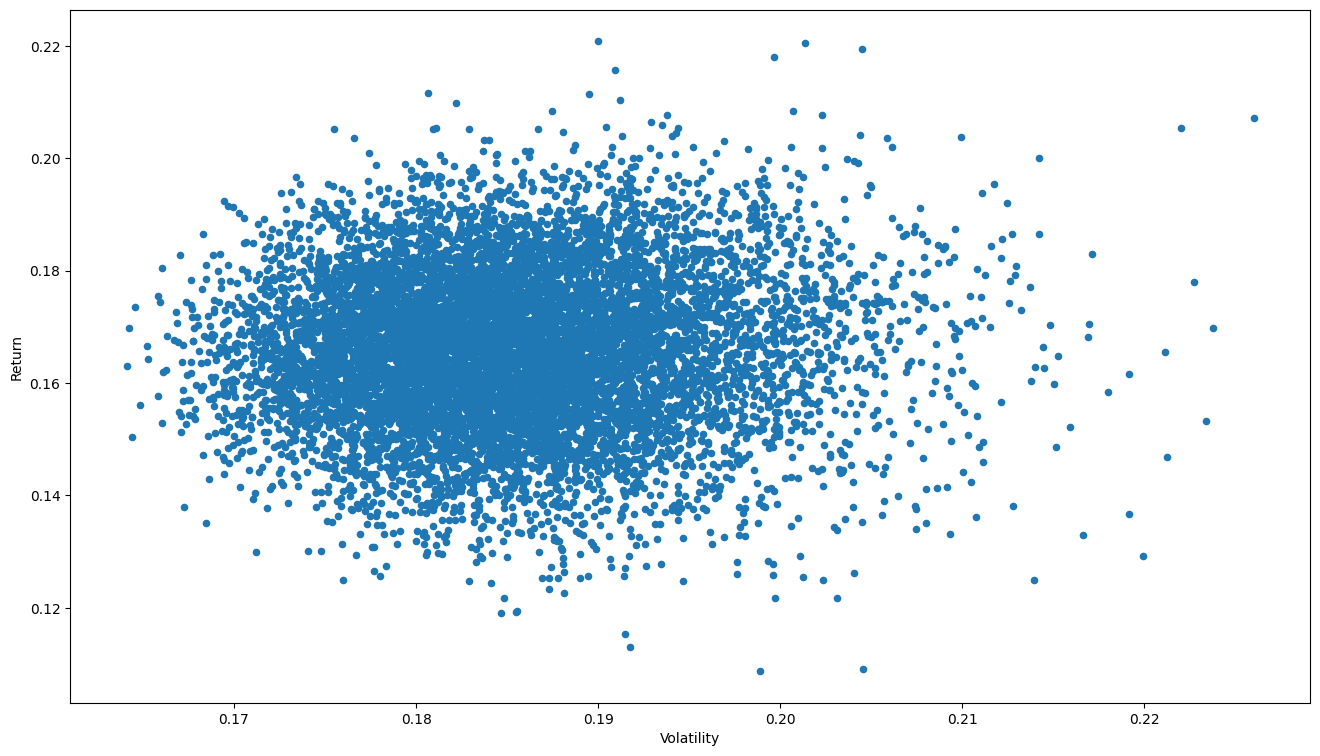

In [28]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

In [29]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 11:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[4296][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])
      
# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : BAJAJFINSV : 12.85
Stock : GLAXO : 11.95
Stock : BATAINDIA : 14.70
Stock : AUBANK : 4.28
Stock : LALPATHLAB : 16.02
Stock : TCI : 5.78
Stock : CROMPTON : 3.84
Stock : SUMICHEM : 0.87
Stock : POWERGRID : 15.13
Stock : PIDILITIND : 10.48
Stock : SIS : 4.10

Volatility : 0.17531245397455947
Return : 0.17299408075137407
